# Problem 1

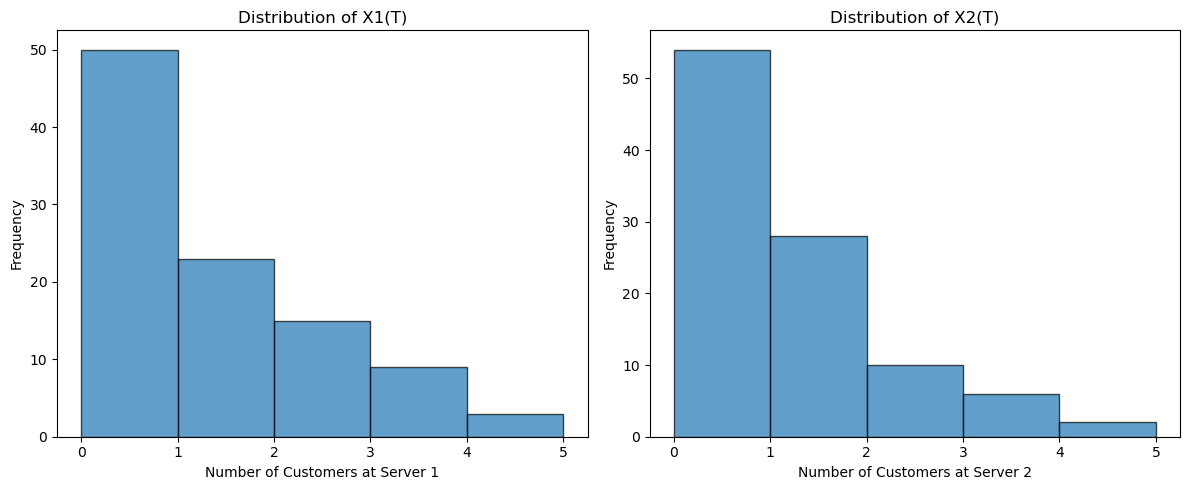

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

lambda_arrival = 1
mu1 = 2
mu2 = 3
p_return = 0.2
q_leave = 0.8
T = 10
replications = 100

X1_T_values = []
X2_T_values = []

for _ in range(replications):
    t = 0
    X1 = 0
    X2 = 0

    while t < T:
        r = lambda_arrival
        if X1 > 0:
            r += mu1
        if X2 > 0:
            r += mu2

        delta_t = random.expovariate(r)
        t += delta_t

        if t >= T:
            break

        P_arrival = lambda_arrival / r
        P_service1 = mu1 / r if X1 > 0 else 0
        P_service2 = mu2 / r if X2 > 0 else 0

        u = random.uniform(0, 1)

        if u <= P_arrival:
            X1 += 1
        elif u <= P_arrival + P_service1:
            X1 -= 1
            X2 += 1
        else:
            v = random.uniform(0, 1)
            if v <= q_leave:
                X2 -= 1
            else:
                X2 -= 1
                X1 += 1

    X1_T_values.append(X1)
    X2_T_values.append(X2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(X1_T_values, bins=range(max(X1_T_values)+1), edgecolor='black', alpha=0.7)
plt.title('Distribution of X1(T)')
plt.xlabel('Number of Customers at Server 1')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(X2_T_values, bins=range(max(X2_T_values)+1), edgecolor='black', alpha=0.7)
plt.title('Distribution of X2(T)')
plt.xlabel('Number of Customers at Server 2')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Problem 2

In [17]:
N = 1100 
burn_in = 100
lambda_arrival = 0.5 
beta_service = 2     
alpha_service = 3   
num_customers = N - burn_in

arrival_times = []
service_times = []
begin_service_times = []
waiting_times = []
departure_times = []

D_prev = 0

for n in range(N):
    T_n = random.expovariate(lambda_arrival)
    
    if n == 0:
        A_n = T_n
    else:
        A_n = arrival_times[-1] + T_n
    arrival_times.append(A_n)

    S_n = sum(random.expovariate(2) for _ in range(3))
    service_times.append(S_n)

    B_n = max(A_n, D_prev)
    begin_service_times.append(B_n)

    W_n = B_n - A_n
    waiting_times.append(W_n)

    D_n = B_n + S_n
    departure_times.append(D_n)

    D_prev = D_n

total_waiting_time = sum(waiting_times[burn_in:])
average_waiting_time = total_waiting_time / num_customers

print(f"Average waiting time over last {num_customers} customers: {average_waiting_time:.4f}")

Average waiting time over last 1000 customers: 2.2690


# Problem 3

In [27]:
N = 100
estimates = []

for _ in range(N):
    x = np.random.normal(loc=2, scale=1, size=4)

    sum_x = np.sum(x)
    L = np.exp(-2 * sum_x + 8)

    s1 = x[0] + x[1]
    s2 = x[2] + x[3]
    s3 = x[0] + x[3]
    s4 = x[1] + x[2]

    min_s = min(s1, s2, s3, s4)
    
    if min_s >= 4:
        estimate = L
    else:
        estimate = 0

    estimates.append(estimate)

alpha_estimate = np.mean(estimates)
print(f"Estimate of α: {alpha_estimate:.6f}")

Estimate of α: 0.000002
